# WeatherPy
----

#### General Observable Trends

There are several observable trends when looking at a randomly selected group of over 500 cities worldwide and comparing their weather conditions. We can draw multiple conclusions on how the weather changes in cities as we approach the equator. 

The first observable trend is shown in the first scatterplot of city latitude versus maximum temperature of each city. From the pattern of the graph, it appears several cities located close to the equator have higher maximum temperatures than cities located further away from the equator. 

A similar trend can be observed when looking at the linear regression graph, for the northern hemisphere of city latitude versus maximum temperature of each city. The trend of the graph and the correlation coefficient indicate there’s a negative correlation between the two variables, meaning the further north of the equator the city is, the cooler the maximum temperature is in the northern hemisphere. In the linear regression graph for the southern hemisphere of city latitude versus maximum temperature of each city, the trend of the graph and the correlation coefficient indicate there is a strong positive correlation between the two variables. This means the closer a city is located to the equator, the warmer the maximum temperature is in the southern hemisphere. 

In regards to city location (latitude) and the percentage of humidity in each city, it’s clear there's no correlation between the two variables. This is clear in the scatterplot, both linear regression graphs, and both correlation coefficients for the northern and southern hemispheres. It's safe to say the latitude of a city does not necessarily correlate to the city's humidity. 

In regards to city location (latitude) and the percentage of cloudiness in each city, it’s clear there's no correlation between the two variables. This is clear in the scatterplot, both linear regression graphs, and both correlation coefficients for the northern and southern hemispheres. It's safe to say the latitude of a city does not necessarily correlate to the city's cloudiness. 

In regards to city location (latitude) and the wind speed in each city, it’s clear there's no correlation between the two variables. This is clear in the scatterplot, both linear regression graphs, and both correlation coefficients for the northern and southern hemispheres. It's safe to say the latitude of a city does not necessarily correlate to the city's wind speed. 

To conclude, according to our analysis, the closer a city is to the equator the warmer the temperature is. All other weather factors do not necessarily correlate with the latitude of a city.

## Dependencies and Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

#Import API key
from api_keys import weather_api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#Open Weather Map API URL and query URL
w_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = w_url + 'appid=' + weather_api_key + '&q=' 

#Counters for count and batch; new city weather list
count = 1
batch = 1
city_weather = []

#Loop through cities
for i, c in enumerate(cities):
    
    #Try: finding city, creating dictionary, adding appropriate values to city_dict
    try:
        response = requests.get(query_url + c + str('&units=imperial')).json() #Perform request; change temp from K to F
        
        print(f'Processing Record {count} of Set {batch} | {c}') 
        
        city_dict = {'City': response['name'],
                     'Lat': response['coord']['lat'],
                     'Lng': response['coord']['lon'],
                     'Max Temp (F)': response['main']['temp_max'],
                     'Humidity (%)': response['main']['humidity'],
                     'Cloudiness (%)': response['clouds']['all'],
                     'Wind Speed (mph)': response['wind']['speed'],
                     'Country': response['sys']['country'],
                     'Date': response['dt']}
        
        city_weather.append(city_dict)
    
    #Except: if city info is not found...
    except:
        print(f'City, {c}, not found. Skipping...')    
   
    #Increase count, increase batch once batch hits 51 and reset count to 1
    count += 1

    if count == 51:
        batch +=1
        count = 1


Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | sur
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | daru
Processing Record 10 of Set 1 | yerbogachen
Processing Record 11 of Set 1 | bria
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | saint-joseph
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | comodoro rivadavia
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | puerto leguizamo
Processing Record 22 of Set 1 | klaksvik
Processing Record 23 of Set 1 | taolanaro
City, taolanaro, not found. Skipping...
Processing Record

Processing Record 41 of Set 4 | long xuyen
Processing Record 42 of Set 4 | phan rang
City, phan rang, not found. Skipping...
Processing Record 43 of Set 4 | sibolga
Processing Record 44 of Set 4 | lae
Processing Record 45 of Set 4 | bahia honda
Processing Record 46 of Set 4 | inuvik
Processing Record 47 of Set 4 | saleaula
City, saleaula, not found. Skipping...
Processing Record 48 of Set 4 | paamiut
Processing Record 49 of Set 4 | angoram
Processing Record 50 of Set 4 | puerto ayora
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | auki
Processing Record 3 of Set 5 | issa
Processing Record 4 of Set 5 | bac lieu
Processing Record 5 of Set 5 | tabiauea
City, tabiauea, not found. Skipping...
Processing Record 6 of Set 5 | zouxian
City, zouxian, not found. Skipping...
Processing Record 7 of Set 5 | uitenhage
Processing Record 8 of Set 5 | nago
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | coroata
Processing Record 11 of Set 5 | butembo
Processi

Processing Record 27 of Set 8 | punta de bombon
Processing Record 28 of Set 8 | chishan
Processing Record 29 of Set 8 | college
Processing Record 30 of Set 8 | vaitupu
City, vaitupu, not found. Skipping...
Processing Record 31 of Set 8 | mayo
Processing Record 32 of Set 8 | gao
Processing Record 33 of Set 8 | grand river south east
City, grand river south east, not found. Skipping...
Processing Record 34 of Set 8 | samusu
City, samusu, not found. Skipping...
Processing Record 35 of Set 8 | pemba
Processing Record 36 of Set 8 | bang krathum
Processing Record 37 of Set 8 | san policarpo
Processing Record 38 of Set 8 | aksum
Processing Record 39 of Set 8 | flinders
Processing Record 40 of Set 8 | olafsvik
Processing Record 41 of Set 8 | lukovetskiy
Processing Record 42 of Set 8 | sabang
Processing Record 43 of Set 8 | bambanglipuro
Processing Record 44 of Set 8 | qaqortoq
Processing Record 45 of Set 8 | mount isa
Processing Record 46 of Set 8 | tigre
Processing Record 47 of Set 8 | mildur

Processing Record 13 of Set 12 | sanming
Processing Record 14 of Set 12 | hovd
Processing Record 15 of Set 12 | yaan
Processing Record 16 of Set 12 | ulladulla
Processing Record 17 of Set 12 | dzhusaly
City, dzhusaly, not found. Skipping...
Processing Record 18 of Set 12 | yuryevets
Processing Record 19 of Set 12 | lakselv
Processing Record 20 of Set 12 | porto novo
Processing Record 21 of Set 12 | innisfail
Processing Record 22 of Set 12 | almaznyy
Processing Record 23 of Set 12 | sembe
Processing Record 24 of Set 12 | grand-santi
Processing Record 25 of Set 12 | seymchan
Processing Record 26 of Set 12 | haines junction
Processing Record 27 of Set 12 | meulaboh
Processing Record 28 of Set 12 | yusva
City, yusva, not found. Skipping...
Processing Record 29 of Set 12 | kenai
Processing Record 30 of Set 12 | altamont
Processing Record 31 of Set 12 | dasoguz
Processing Record 32 of Set 12 | belmonte
Processing Record 33 of Set 12 | sangar
Processing Record 34 of Set 12 | claveria
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create dataframe from above dictionary for the weather of the cities
weather_df = pd.DataFrame(city_weather)

#Format the date
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit = 's')
weather_df['Date'] = weather_df['Date'].dt.strftime('%m/%d/%Y')

#Output the data to a .csv
weather_df.to_csv(output_data_file)
weather_df

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,George Town,5.41,100.34,78.80,94,40,2.64,MY,07/16/2020
1,Kavieng,-2.57,150.80,81.63,72,4,2.26,PG,07/16/2020
2,Castro,-24.79,-50.01,70.34,55,0,5.08,BR,07/16/2020
3,Sur,22.57,59.53,84.87,69,27,12.53,OM,07/16/2020
4,Barrow,71.29,-156.79,35.60,80,75,10.29,US,07/16/2020
...,...,...,...,...,...,...,...,...,...
552,Dunedin,-45.87,170.50,41.00,74,88,1.99,NZ,07/16/2020
553,The Valley,18.22,-63.06,86.00,69,20,14.99,AI,07/16/2020
554,Bièvre,49.94,5.02,60.01,95,100,4.09,BE,07/16/2020
555,Biak,-0.91,122.88,75.29,83,18,3.42,ID,07/16/2020


In [5]:
#Dataframe count
weather_df.count()

City                557
Lat                 557
Lng                 557
Max Temp (F)        557
Humidity (%)        557
Cloudiness (%)      557
Wind Speed (mph)    557
Country             557
Date                557
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#Summary statistics of dataframe
weather_df.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,557.000000,557.000000,557.000000,557.000000,557.00000,557.000000
mean,19.085799,19.303357,70.070305,68.879713,52.81149,7.672747
std,33.093446,90.310991,14.803773,21.426256,35.89471,4.881304
min,-54.800000,-175.200000,26.600000,1.000000,0.00000,0.200000
25%,-8.420000,-58.650000,59.520000,57.000000,20.00000,4.030000
50%,21.320000,22.790000,72.370000,73.000000,56.00000,6.710000
75%,46.620000,100.340000,80.190000,85.000000,90.00000,10.290000
max,78.220000,179.320000,108.970000,100.000000,100.00000,28.430000


In [7]:
#Make a new DataFrame equal to the city data to drop all humidity outliers by index.
city_data = weather_df
city_data

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,George Town,5.41,100.34,78.80,94,40,2.64,MY,07/16/2020
1,Kavieng,-2.57,150.80,81.63,72,4,2.26,PG,07/16/2020
2,Castro,-24.79,-50.01,70.34,55,0,5.08,BR,07/16/2020
3,Sur,22.57,59.53,84.87,69,27,12.53,OM,07/16/2020
4,Barrow,71.29,-156.79,35.60,80,75,10.29,US,07/16/2020
...,...,...,...,...,...,...,...,...,...
552,Dunedin,-45.87,170.50,41.00,74,88,1.99,NZ,07/16/2020
553,The Valley,18.22,-63.06,86.00,69,20,14.99,AI,07/16/2020
554,Bièvre,49.94,5.02,60.01,95,100,4.09,BE,07/16/2020
555,Biak,-0.91,122.88,75.29,83,18,3.42,ID,07/16/2020


In [8]:
#Get the indices of cities that have humidity over 100%.
humidityindex = city_data[city_data['Humidity (%)']>100].index
humidityindex

Int64Index([], dtype='int64')

In [9]:
#Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Extract relevant fields from the data frame
clean_city_data = city_data.drop(humidityindex, inplace=False)                                      
clean_city_data

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,George Town,5.41,100.34,78.80,94,40,2.64,MY,07/16/2020
1,Kavieng,-2.57,150.80,81.63,72,4,2.26,PG,07/16/2020
2,Castro,-24.79,-50.01,70.34,55,0,5.08,BR,07/16/2020
3,Sur,22.57,59.53,84.87,69,27,12.53,OM,07/16/2020
4,Barrow,71.29,-156.79,35.60,80,75,10.29,US,07/16/2020
...,...,...,...,...,...,...,...,...,...
552,Dunedin,-45.87,170.50,41.00,74,88,1.99,NZ,07/16/2020
553,The Valley,18.22,-63.06,86.00,69,20,14.99,AI,07/16/2020
554,Bièvre,49.94,5.02,60.01,95,100,4.09,BE,07/16/2020
555,Biak,-0.91,122.88,75.29,83,18,3.42,ID,07/16/2020


In [10]:
#Export the City_Data into a csv
clean_city_data.to_csv('output_data/CleanCityData.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
#Function for creating scatterplots
def temp(y, x=(clean_city_data['Lat'])):
    plt.scatter(x,y, marker = 'o', edgecolor = 'black', facecolor = 'purple') #Create plot
    plt.xlabel(x.name + 'itude')
    plt.ylabel(y.name)
    plt.title('City ' + x.name + 'itude vs. ' + y.name + ' - (' + clean_city_data['Date'][0] + ')')
    plt.grid()
    plt.savefig('output_data/' + x.name + y.name + '.png') #Saving images

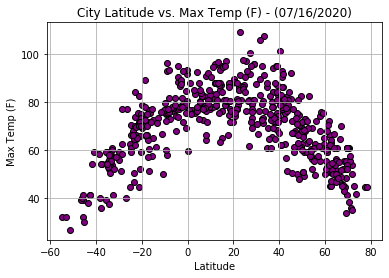

In [12]:
#Latitude vs. Max Temp Plot
temp(clean_city_data['Max Temp (F)'])

The above scatterplot is an analysis of latitude of over 500 randomly selected cities versus the maximum temperature of each city. From the pattern of this graph, it appears several cities located close to the equator have higher maximum temperatures than cities located further away from the equator. 

## Latitude vs. Humidity Plot

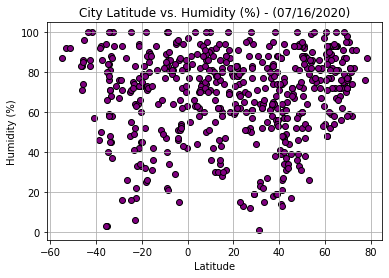

In [13]:
#Latitude vs. Humidity Plot
temp(clean_city_data['Humidity (%)'])

The above scatterplot is an analysis of latitude of over 500 randomly selected cities versus the percentage of humidity in each city. After observing this graph, there does not appear to be a relationship between the location of a city and the city's humidity. 

## Latitude vs. Cloudiness Plot

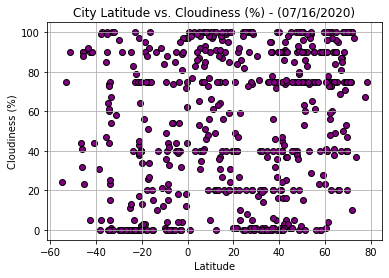

In [14]:
#Latitude vs. Cloudiness Plot
temp(clean_city_data['Cloudiness (%)'])

The above scatterplot is an analysis of latitude of over 500 randomly selected cities versus the percentage of cloudiness of each city. After observing this graph, there does not appear to be a relationship between the location of a city and the city's cloudiness.

## Latitude vs. Wind Speed Plot

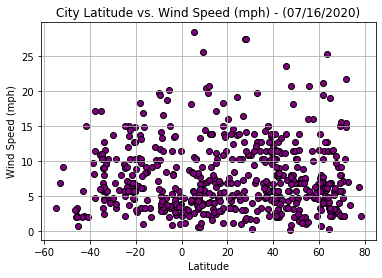

In [15]:
#Latitude vs. Wind Speed Plot
temp(clean_city_data['Wind Speed (mph)'])

The above scatterplot is an analysis of latitude of over 500 randomly selected cities versus the wind speed of each city. After observing this graph, there does not appear to be a relationship between the location of a city and the city's wind speed.

## Linear Regression

In [16]:
#Function to create Linear Regression plots
def lin_reg(y, x=clean_city_data['Lat']):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) #Create linreg line
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)) #LinReg equation
    plt.scatter(x,y) #Create plot
    plt.plot(x, regress_values,"r-")
    plt.annotate(line_eq, params, fontsize=15, color='red')
    plt.xlabel(x.name + 'itude')
    plt.ylabel(y.name)
    plt.title('City ' + x.name + 'itude vs. ' + y.name + ' - (' + clean_city_data['Date'][0] + ')')
    print(f'The correlation coefficient, r, is: {rvalue}') #Printing the r value
    print(f'And r-squared is: {rvalue**2}') #Printing the r squared value


In [17]:
#Create Northern and Southern Hemisphere DataFrames
north_df = clean_city_data.loc[clean_city_data['Lat']>=0, :]
#print(north_df.count()) #Total points in plots below

south_df = clean_city_data.loc[clean_city_data['Lat']<0, :]
#print(south_df.count()) #Total points in plots below

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient, r, is: -0.7104844589676614
And r-squared is: 0.5047881664345706


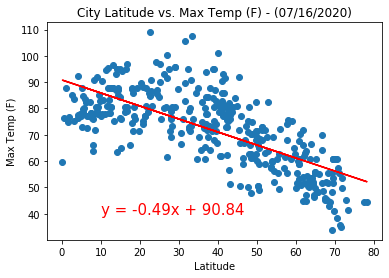

In [18]:
#Latitude vs. Max Temp Linear Regression - Northern Hemisphere
params = (10,40)
lin_reg(north_df['Max Temp (F)'], x = north_df['Lat'])
plt.savefig('output_data/NorthLatTempLinReg.png')

The above linear regression graph is an analysis of latitude of randomly selected cities in the northern hemisphere versus the maximum temperature of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there is a negative correlation between the two variables. It's safe to say the further north of the equator the city is, the cooler the maximum temperature is in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.8342209427773695
And r-squared is: 0.6959245813683631


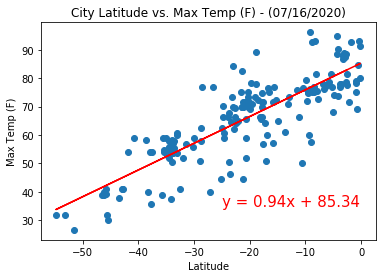

In [19]:
#Latitude vs. Max Temp Linear Regression - Southern hemisphere
params = (-25,35)
lin_reg(south_df['Max Temp (F)'], x = south_df['Lat'])
plt.savefig('output_data/SouthLatTempLinReg.png')

The above linear regression graph is an analysis of latitude of randomly selected cities in the southern hemisphere versus the maximum temperature of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there is a strong positive correlation between the two variables. It's safe to say the closer a city is located to the equator, the hotter the maximum temperature is in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.10030781219743236
And r-squared is: 0.01006165718783536


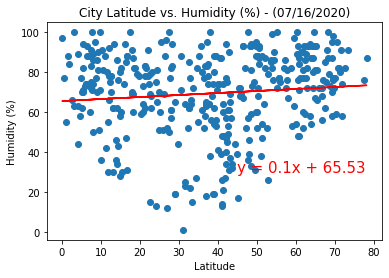

In [20]:
#Latitude vs. Humidity Linear Regression - Northern Hemisphere
params = (45,30)
lin_reg(north_df['Humidity (%)'], x = north_df['Lat'])
plt.savefig('output_data/NorthLatHumLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the northern hemisphere versus the humidity of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's humidity in the northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient, r, is: -0.09886762158554807
And r-squared is: 0.00977480659798313


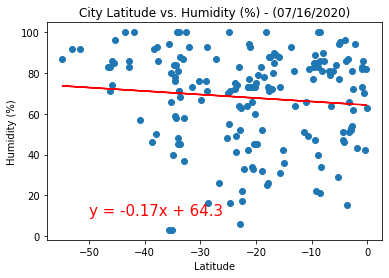

In [21]:
#Latitude vs. Humidity Linear Regression - Southern Hemisphere
params = (-50,10)
lin_reg(south_df['Humidity (%)'], x = south_df['Lat'])
plt.savefig('output_data/SouthLatHumLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the southern hemisphere versus the humidity of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's humidity in the southern hemisphere. (Similar to the previous northern hemisphere graph of latitude versus maximum temperature).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.04712644577058634
And r-squared is: 0.002220901890968015


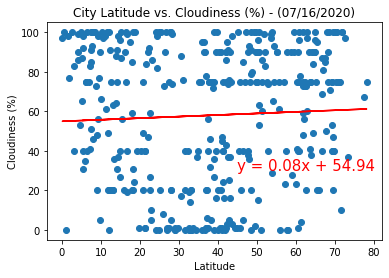

In [22]:
#Latitude vs Cloudiness Linear Regression - Northern Hemisphere
params = (45,30)
lin_reg(north_df['Cloudiness (%)'], x = north_df['Lat'])
plt.savefig('output_data/NorthLatCloudLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the northern hemisphere versus the cloudiness of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient, r, is: -0.06840165960853124
And r-squared is: 0.004678787037201374


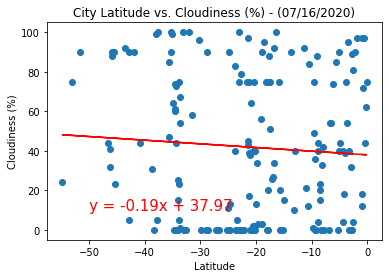

In [23]:
#Latitude vs Cloudiness Linear Regression - Southern Hemisphere
params = (-50,10)
lin_reg(south_df['Cloudiness (%)'], x = south_df['Lat'])
plt.savefig('output_data/SouthLatCloudLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the southern hemisphere versus the cloudiness of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's cloudiness in the southern hemisphere. (Similar to the previous northern hemisphere graph of latitude versus cloudiness).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient, r, is: -0.011298240267229274
And r-squared is: 0.00012765023313604103


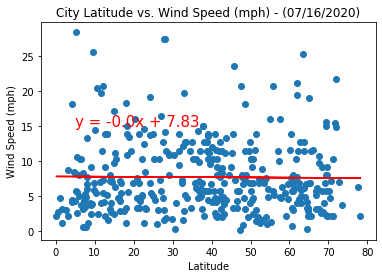

In [24]:
#Latitude vs Wind Speed Linear Regression - Northern Hemisphere
params = (5,15)
lin_reg(north_df['Wind Speed (mph)'], x = north_df['Lat'])
plt.savefig('output_data/NorthLatWindLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the northern hemisphere versus the wind speed of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.04899633046142828
And r-squared is: 0.002400640398685485


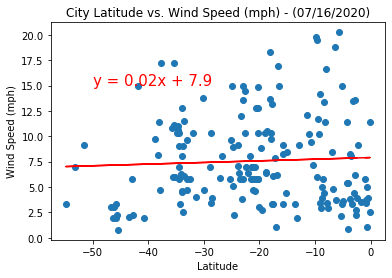

In [25]:
#Latitude vs Wind Speed Linear Regression - Southern Hemisphere
params = (-50,15)
lin_reg(south_df['Wind Speed (mph)'], x = south_df['Lat'])
plt.savefig('output_data/SouthLatWindLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the southern hemisphere versus the wind speed of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's wind speed in the southern hemisphere. (Similar to the previous northern hemisphere graph of latitude versus wind speed).